# Data Analysis Description

The purpose of this data analysis is to compare survey results (Sleep Study Data) to calculated statistics (Stress in Sleep) and to find out if there are any correlations and contradictions between a person's sleep behavior and how the person describes their sleeping habits. The two datasets are not directly related, but I can compare similar values to discover these contradictions.

The reason why I wanted to use two datasets because there isn't as much data as I wanted for each dataset.

Update: I later realized that "Stress in Sleep" dataset is generated data (data not created through artificial means), so part of this analysis has became a way to identify generated data.

# Data Setup

### Import Modules

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

### Import of CSV files

In [72]:
sleep_study_df = pd.read_csv("SleepStudyData.csv")
stress_in_sleep_df = pd.read_csv("StressInSleep.csv")

### Head and Tail of Sleep Study Data

To get a feel for how the data looks, specifically the columns.

In [73]:
sleep_study_df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [74]:
sleep_study_df.tail()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
99,No,7.0,Yes,Yes,2,Yes
100,No,7.0,No,Yes,3,Yes
101,Yes,8.0,Yes,Yes,3,Yes
102,Yes,7.0,Yes,Yes,2,Yes
103,Yes,6.0,Yes,Yes,3,Yes


Observation: All columns seem pretty fairly easy to understand, but will rename later to have more clarity.

### Head and Tail of Stress in Sleep Data

In [75]:
stress_in_sleep_df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [76]:
stress_in_sleep_df.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


Observation: All columns here are hard to understand, so I will definitely rename these to match the column names mentioned on the dataset description.

### Data Cleanup and Column Renaming
Column names should be easy to understand.

In [77]:
#sleep_study
sleep_study_df.rename(columns={'Enough':'enough_sleep', 'Hours':'sleeping_hours', 'PhoneReach':'phone_reach', 'PhoneTime':'phone_time', 'Tired':'tiredness_rating', 'Breakfast':'had_breakfast'}, inplace=True)

#stress_in_sleep
stress_in_sleep_df.rename(columns={'sr':'snoring_rate', 'rr':'respiration_rate', 't':'body_temperature', 'lm':'limb_movement', 'bo':'body_oxygen', 'rem':'eye_movement', 'sr.1':'sleeping_hours', 'hr':'heart_rate', 'sl':'stress_level'}, inplace=True)

In [78]:
display(sleep_study_df.head())
display(stress_in_sleep_df.head())

,enough_sleep,sleeping_hours,phone_reach,phone_time,tiredness_rating,had_breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


,snoring_rate,respiration_rate,body_temperature,limb_movement,body_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


### Amount of Data for Datasets
Display number rows and columns for each dataframe.

In [79]:
print(f'Sleep Study Rows and Columns: {sleep_study_df.shape}')
print(f'Stress in Sleep Rows and Columns: {stress_in_sleep_df.shape}')

Sleep Study Rows and Columns: (104, 6)
Stress in Sleep Rows and Columns: (630, 9)


### Columns with Shared Qualities
Display unique values for sleeping hours from both datasets.

In [80]:
display(sleep_study_df.sleeping_hours.unique())
display(stress_in_sleep_df.sleeping_hours.unique())

array([ 8.,  6.,  7.,  4., 10.,  9.,  2.,  5., nan])

array([1.84 , 1.552, 7.   , 0.768, 8.248, 6.376, 7.8  , 9.   , 7.112,
       6.104, 4.016, 6.856, 8.44 , 0.   , 1.04 , 5.464, 5.528, 0.832,
       0.208, 2.552, 4.64 , 4.592, 3.464, 1.072, 1.328, 5.736, 4.784,
       5.192, 1.968, 2.312, 8.648, 8.072, 2.   , 0.896, 8.392, 7.448,
       2.144, 2.84 , 4.304, 8.712, 3.992, 2.432, 6.344, 8.84 , 5.72 ,
       1.76 , 7.736, 6.216, 4.352, 1.712, 1.008, 6.696, 0.144, 7.64 ,
       2.24 , 5.048, 8.968, 2.072, 8.312, 5.096, 6.536, 7.064, 8.472,
       6.296, 1.344, 5.128, 5.112, 5.784, 3.248, 5.976, 5.48 , 5.32 ,
       1.664, 2.768, 0.88 , 3.2  , 7.08 , 2.48 , 4.28 , 4.544, 7.016,
       5.704, 2.216, 2.336, 4.88 , 5.88 , 3.344, 7.976, 1.408, 3.032,
       3.296, 4.4  , 8.808, 5.992, 6.056, 1.376, 6.616, 0.48 , 2.864,
       6.44 , 3.32 , 8.12 , 1.696, 6.936, 8.424, 8.344, 4.712, 8.088,
       3.704, 0.192, 4.76 , 8.728, 3.272, 7.768, 8.504, 7.032, 7.048,
       5.064, 1.136, 8.152, 8.6  , 2.696, 1.776, 4.184, 3.584, 6.152,
       2.912, 4.52 ,

Since there are a lot more unique values for the second dataset, I won't merge the two datasets. Instead I will use sleep hour averages from the first dataset to make correlation with the second dataset's data (will make more sense later).

### Check column types.

In [81]:
sleep_study_df.dtypes

enough_sleep         object
sleeping_hours      float64
phone_reach          object
phone_time           object
tiredness_rating      int64
had_breakfast        object
dtype: object

In [82]:
stress_in_sleep_df.dtypes

snoring_rate        float64
respiration_rate    float64
body_temperature    float64
limb_movement       float64
body_oxygen         float64
eye_movement        float64
sleeping_hours      float64
heart_rate          float64
stress_level          int64
dtype: object

# Analysis of Datasets

### Informational Data

1. Using the "Stress in Sleep" dataset, calculate the mean and median hours of sleep for each stress level.

In [83]:
stress_in_sleep_df.groupby('stress_level').agg({
    'sleeping_hours': ['mean', 'median']})

sleeping_hours       
                       mean median
stress_level                      
0                       8.0    8.0
1                       6.0    6.0
2                       3.5    3.5
3                       1.0    1.0
4                       0.0    0.0

Observation: It's interesting how the amount of sleeping hours for all for data with stress level 4 is 0. What could this mean? Is this evidence of auto-generated data or is there something specific?

2. Using the "Sleep Study" dataset, find the top 10 sleeping hours of people with tiredness ratings 3 and higher. Do the same for people with tiredness ratings lower than 3.

In [84]:
lower_tiredness_mask = sleep_study_df['tiredness_rating'] >= 3
higher_tiredness_mask = sleep_study_df['tiredness_rating'] < 3

sorted_low_sleep_study_df = sleep_study_df[lower_tiredness_mask].nlargest(10, 'sleeping_hours')
print('Tiredness Rating 3 and Higher:')
display(sorted_low_sleep_study_df.loc[:, ["sleeping_hours", "tiredness_rating"]])

print('Tiredness Rating Lower than 3:')
sorted_high_sleep_study_df = sleep_study_df[higher_tiredness_mask].nlargest(10, 'sleeping_hours')
display(sorted_high_sleep_study_df.loc[:, ["sleeping_hours", "tiredness_rating"]])

Tiredness Rating 3 and Higher:


,sleeping_hours,tiredness_rating
10,10.0,4
18,9.0,3
57,9.0,5
58,9.0,4
86,9.0,5
0,8.0,3
15,8.0,3
17,8.0,3
19,8.0,3
31,8.0,3


Tiredness Rating Lower than 3:


,sleeping_hours,tiredness_rating
29,9.0,2
37,9.0,2
46,9.0,1
93,9.0,2
13,8.0,2
30,8.0,2
40,8.0,1
83,8.0,2
84,8.0,1
4,7.0,2


Observation: The top 10 for each set of tiredness levels are more uncorrelated than expected, so I'm also going to find the top least sleeping hours for each set.

3. Using the "Sleep Study" dataset, find the least 10 sleeping hours of people with tiredness ratings 3 and higher. Do the same for people with tiredness ratings lower than 3.

In [85]:
print('Tiredness Levels Lower than 3:')
sorted_low_sleep_study_df = sleep_study_df[lower_tiredness_mask].nsmallest(10, 'sleeping_hours')
display(sorted_low_sleep_study_df.loc[:, ["sleeping_hours"]])

print('Tiredness Levels 3 and Higher:')
sorted_high_sleep_study_df = sleep_study_df[higher_tiredness_mask].nsmallest(10, 'sleeping_hours')
display(sorted_high_sleep_study_df.loc[:, ["sleeping_hours", "tiredness_rating"]])

Tiredness Levels Lower than 3:


,sleeping_hours
20,2.0
62,2.0
44,4.0
22,5.0
38,5.0
42,5.0
47,5.0
50,5.0
71,5.0
72,5.0


Tiredness Levels 3 and Higher:


,sleeping_hours,tiredness_rating
8,4.0,2
21,4.0,2
49,4.0,2
24,5.0,2
53,5.0,2
55,5.0,2
2,6.0,2
27,6.0,2
88,6.0,2
4,7.0,2


4. __Is there numerical evidence that having breakfast influences a person's tiredness rating?__ Using the "Sleep Study" dataset, find the average tiredness rating for people who do eat breakfast and for people who don't eat breakfast.

In [86]:
yes_breakfast = sleep_study_df["had_breakfast"] == "Yes"
no_breakfast = sleep_study_df["had_breakfast"] == "No"

display(f"Ate Breakfast: {sleep_study_df[yes_breakfast].tiredness_rating.mean()}")
display(f"No Breakfast: {sleep_study_df[no_breakfast].tiredness_rating.mean()}")

'Ate Breakfast: 2.873015873015873'

'No Breakfast: 3.3902439024390243'

5. Using the "Stress in Sleep" dataset, find the top ten amounts of body oxygen for people who get 4 or more hours of sleep. Do the same for people who get less than 4 hours of sleep.

In [87]:
high_sleep_hour = stress_in_sleep_df["sleeping_hours"] >= 4
low_sleep_hour = stress_in_sleep_df["sleeping_hours"] < 4

print('Body Oxygen Levels for Sleeping Hours Lower than 4:')
sorted_low_stress_in_sleep_df = stress_in_sleep_df[low_sleep_hour].nlargest(10, "body_oxygen")
display(sorted_low_stress_in_sleep_df.loc[:, ["sleeping_hours", "body_oxygen"]])

print('Body Oxygen Levels for Sleeping Hours 4 and Higher:')
sorted_high_stress_in_sleep_df = stress_in_sleep_df[high_sleep_hour].nlargest(10, "body_oxygen")
display(sorted_high_stress_in_sleep_df.loc[:, ["sleeping_hours", "body_oxygen"]])

Body Oxygen Levels for Sleeping Hours Lower than 4:


,sleeping_hours,body_oxygen
44,3.992,91.328
262,3.968,91.312
563,3.944,91.296
435,3.920,91.280
344,3.896,91.264
189,3.872,91.248
307,3.848,91.232
433,3.824,91.216
581,3.800,91.200
363,3.776,91.184


Body Oxygen Levels for Sleeping Hours 4 and Higher:


,sleeping_hours,body_oxygen
7,9.000,97.000
477,8.984,96.984
66,8.968,96.968
419,8.952,96.952
432,8.936,96.936
315,8.920,96.920
449,8.904,96.904
396,8.888,96.888
295,8.872,96.872
516,8.856,96.856


6. __Is there a matching correlation between the stress level and a person's claim that they get enough sleep?__ First using the "Sleep Study" dataset, find the average number of hours of sleep for people who claim to get enough sleep. After that, use the "Stress in Sleep" dataset and find the top twenty stress levels within the -0.5 and +0.5 range of sleep hour average from the other dataset (ex. if you got an average of 6.3 hours as your result, your range will be 5.8 to 6.8 hours).

In [88]:
enough_sleep = sleep_study_df["enough_sleep"] == "Yes"

result_mean = sleep_study_df[enough_sleep].sleeping_hours.mean()
print(f'Result Mean: {result_mean}')

Result Mean: 7.4


In [89]:
given_range = (result_mean - 0.5 <= stress_in_sleep_df.sleeping_hours) & (stress_in_sleep_df.sleeping_hours <= result_mean + 0.5 )

ranged_stress_in_sleep_df = stress_in_sleep_df[given_range].nlargest(20, 'stress_level')
display(ranged_stress_in_sleep_df.loc[:, ["sleeping_hours", "stress_level"]])


,sleeping_hours,stress_level
2,7.000,1
134,6.936,1
170,6.920,1
297,6.904,1
450,6.968,1
533,6.984,1
583,6.952,1
6,7.800,0
8,7.112,0
38,7.448,0


7. __Does eating breakfast affect/rely on body temperature?__ First using the "Sleep Study" dataset, find the average number of hours of sleep for people who eat breakfast and for those who do not eat breakfast. After that, use the "Stress in Sleep" dataset and find the average body temperature within the -0.5 and +0.5 range of sleep hour average from the other dataset.

In [90]:
yes_breakfast = sleep_study_df["had_breakfast"] == "Yes"
no_breakfast = sleep_study_df["had_breakfast"] == "No"

breakfast_hour_sleep_mean = sleep_study_df[yes_breakfast].sleeping_hours.mean()
no_breakfast_hour_sleep_mean = sleep_study_df[no_breakfast].sleeping_hours.mean()

print(f"Sleeping Hours of Those Who Had Breakfast: {breakfast_hour_sleep_mean}\nSleeping Hours of Those Who Didn't Eat Breakfast: {no_breakfast_hour_sleep_mean}")

Sleeping Hours of Those Who Had Breakfast: 6.918032786885246
Sleeping Hours of Those Who Didn't Eat Breakfast: 6.2682926829268295


In [91]:
given_range = (breakfast_hour_sleep_mean - 0.5 <= stress_in_sleep_df.sleeping_hours) & (stress_in_sleep_df.sleeping_hours <= breakfast_hour_sleep_mean + 0.5 )

print(f'Body Temperature of People Who Had Breakfast:\n{stress_in_sleep_df[given_range].body_temperature.mean()}')

Body Temperature of People Who Had Breakfast:
95.96512499999997


In [92]:
given_range = (no_breakfast_hour_sleep_mean - 0.5 <= stress_in_sleep_df.sleeping_hours) & (stress_in_sleep_df.sleeping_hours <= no_breakfast_hour_sleep_mean + 0.5 )

print(f'Body Temperature of People Who Had No Breakfast:\n{stress_in_sleep_df[given_range].body_temperature.mean()}')

Body Temperature of People Who Had No Breakfast:
95.272


Observation: There is a small difference in average body temperature between those who eat breakfast and doesn't eat breakfast, but the difference is marginal.

8. __Is tiredness rating influenced by the amount of limb movement a person experiences in their sleep?__ Using the "Sleep Study" dataset, find the average sleeping hours of people with tiredness ratings 3 and higher. Do the same for people with tiredness ratings lower than 3. Now using the "Stress in Sleep" dataset, find the average amount of limb movement within -0.5 and +0.5 range for each of the sleep hour averages.

In [93]:
low_tired_sleep_mean = sleep_study_df[lower_tiredness_mask].sleeping_hours.mean()
high_tired_sleep_mean = sleep_study_df[higher_tiredness_mask].sleeping_hours.mean()

print(f"Sleeping Hour Average of People of Tiredness Rating Levels Lower Than 3:\n{low_tired_sleep_mean}\n ")
print(f"Sleeping Hour Average of People of Tiredness Rating Levels 3 or Higher:\n{high_tired_sleep_mean}")

Sleeping Hour Average of People of Tiredness Rating Levels Lower Than 3:
6.583333333333333
 
Sleeping Hour Average of People of Tiredness Rating Levels 3 or Higher:
6.833333333333333


In [94]:
given_range = (low_tired_sleep_mean - 0.5 <= stress_in_sleep_df.sleeping_hours) & (stress_in_sleep_df.sleeping_hours <= low_tired_sleep_mean + 0.5 )

print(f'Amount of Limb Movement of People With a Tiredness Rating Lower Than 3:\n{stress_in_sleep_df[given_range].limb_movement.mean()}')

Amount of Limb Movement of People With a Tiredness Rating Lower Than 3:
9.031749999999997


In [95]:
given_range = (high_tired_sleep_mean - 0.5 <= stress_in_sleep_df.sleeping_hours) & (stress_in_sleep_df.sleeping_hours <= high_tired_sleep_mean + 0.5 )

print(f'Amount of Limb Movement of People With a Tiredness Rating 3 and Higher:\n{stress_in_sleep_df[given_range].limb_movement.mean()}')

Amount of Limb Movement of People With a Tiredness Rating 3 and Higher:
7.887999999999998


### Visualization Data

In [96]:
label_size = 15
title_size = 20

1. Using the "Stress in Sleep" dataset, create a scatterplot that describes the correlation between a person's heart rate and their sleeping hours.

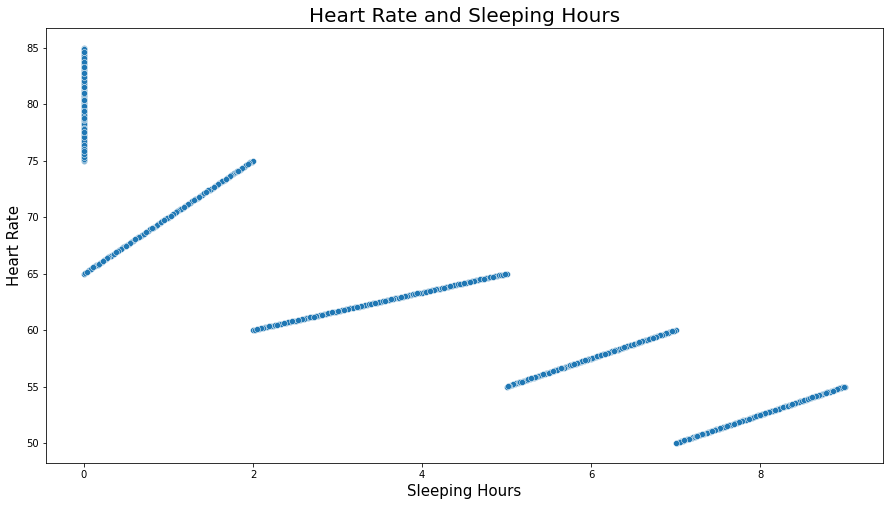

In [97]:
plt.figure(figsize=(15, 8))

sleeping_hours = stress_in_sleep_df.sleeping_hours
heart_rate = stress_in_sleep_df.heart_rate

plot = sns.scatterplot(x=sleeping_hours, y=heart_rate)

plt.xlabel('Sleeping Hours', fontsize=label_size)
plt.ylabel('Heart Rate', fontsize=label_size)
plt.title("Heart Rate and Sleeping Hours", fontsize=title_size);

Observation: There's a sign of auto-generated data.

2. Using the "Sleep Study" dataset, create a bar chart that describes the amount of sleeping hours of the following:
<ul>
<li>People who eat breakfast and has gotten enough sleep</li>
<li>People who did not eat breakfast and has gotten enough sleep</li>
<li>People who eat breakfast and hasn't gotten enough sleep</li>
<li>People who did not eat breakfast and hasn't gotten enough sleep</li>
</ul>


Note: There should be 4 bars.

IndexError: list index out of range

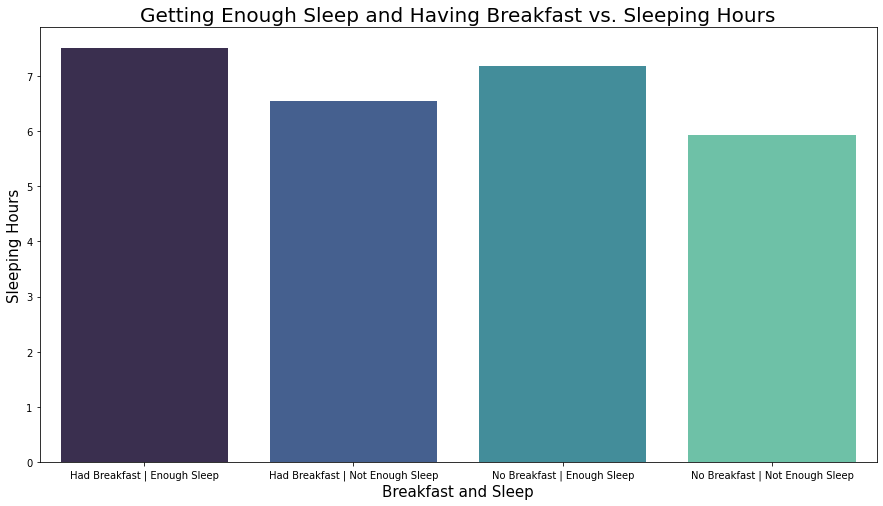

In [98]:
plt.figure(figsize=(15, 8))

breakfast_list = ['Yes', 'No']
enough_sleep_list = ['Yes', 'No']

breakfast_sleep = []
breakfast_sleep_for_label = []
means = []

for b in breakfast_list:
    for e in enough_sleep_list:
        mask = (sleep_study_df["had_breakfast"] == b) & (sleep_study_df["enough_sleep"] == e)
        average = sleep_study_df[mask].sleeping_hours.mean()
        breakfast_sleep.append(f'{b} {e}')
        means.append(average)

for s in breakfast_sleep:
    if s == "Yes Yes":
        breakfast_sleep_for_label.append("Had Breakfast | Enough Sleep")
    if s == "Yes No":
        breakfast_sleep_for_label.append("Had Breakfast | Not Enough Sleep")
    if s == "No Yes":
        breakfast_sleep_for_label.append("No Breakfast | Enough Sleep")
    if s == "No No":
        breakfast_sleep_for_label.append("No Breakfast | Not Enough Sleep")

sns.barplot(x=breakfast_sleep_for_label, y=means, palette="mako")
plt.xlabel('Breakfast and Sleep', fontsize=label_size)
plt.ylabel('Sleeping Hours', fontsize=label_size)
plt.title("Getting Enough Sleep and Having Breakfast vs. Sleeping Hours", fontsize=title_size);
plot.bar_label(plot.containers[0], fontsize=label_size);


3. Using the "Stress in Sleep" dataset, create a scatterplot that plots eye movement levels for people with a heart rate level higher than or equal to the average heart rate level and for people with a heart rate level lower than the average heart rate level (there should be two colors representing each group of people).

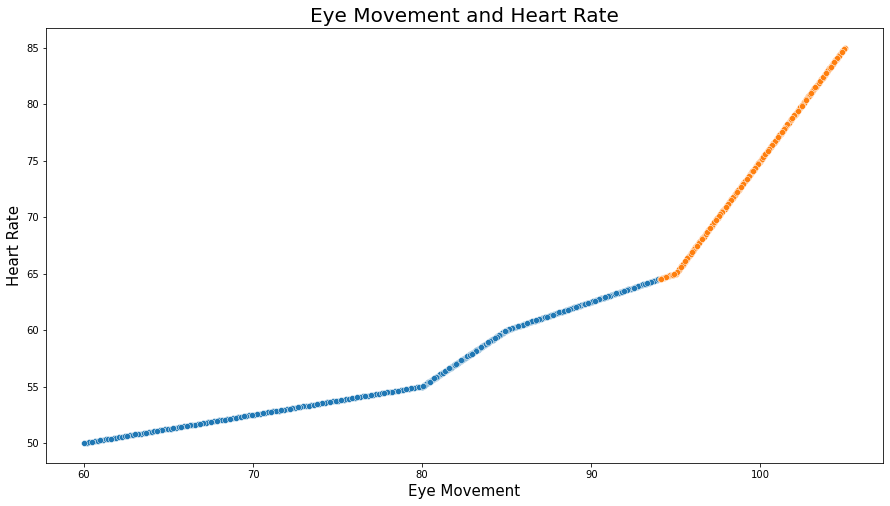

In [ ]:
plt.figure(figsize=(15, 8))

lower_heart_rate = stress_in_sleep_df["heart_rate"] < stress_in_sleep_df["heart_rate"].mean()
higher_heart_rate = stress_in_sleep_df["heart_rate"] >= stress_in_sleep_df["heart_rate"].mean()

eye_movement = stress_in_sleep_df["eye_movement"]
lower_heart_rate = stress_in_sleep_df[lower_heart_rate].heart_rate
higher_heart_rate = stress_in_sleep_df[higher_heart_rate].heart_rate

plot = sns.scatterplot(x=eye_movement, y=lower_heart_rate)
plot1 = sns.scatterplot(x=eye_movement, y=higher_heart_rate)

plt.xlabel('Eye Movement', fontsize=label_size)
plt.ylabel('Heart Rate', fontsize=label_size)
plt.title("Eye Movement and Heart Rate", fontsize=title_size);


Observation: Another sign of generated data.

4. Using the "Stress in Sleep" dataset, create a bar plot that plots the average body oxygen levels for people with a stress level higher than or equal to the median stress level and for people with a stress level lower than the median heart rate level (there should be two colors representing each group of people).

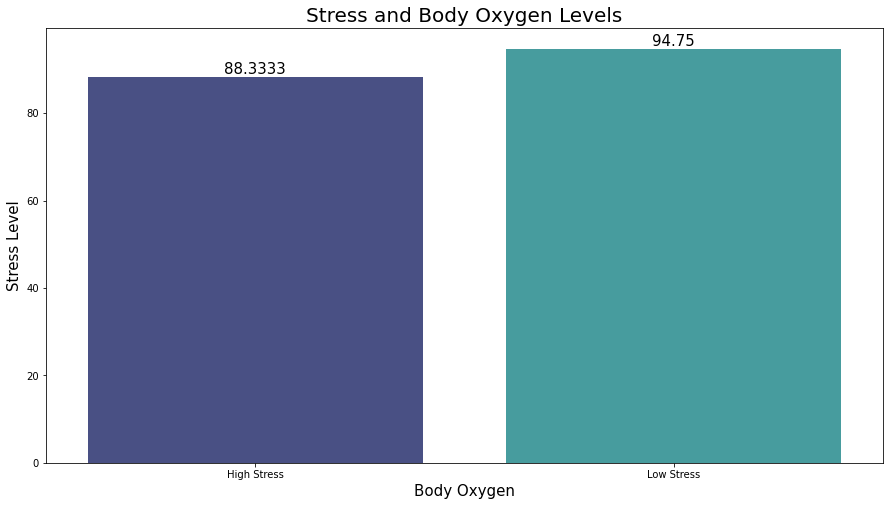

In [ ]:
plt.figure(figsize=(15, 8))

lower_stress_level = stress_in_sleep_df["stress_level"] < stress_in_sleep_df["stress_level"].median()
higher_stress_level = stress_in_sleep_df["stress_level"] >= stress_in_sleep_df["stress_level"].median()

stress_level = ["High Stress", "Low Stress"]
body_oxygen = [stress_in_sleep_df[higher_stress_level].body_oxygen.mean(), stress_in_sleep_df[lower_stress_level].body_oxygen.mean()]

plot = sns.barplot(x=stress_level, y=body_oxygen, palette="mako")

plt.xlabel('Body Oxygen', fontsize=label_size)
plt.ylabel('Stress Level', fontsize=label_size)
plt.title("Stress and Body Oxygen Levels", fontsize=title_size)
plot.bar_label(plot.containers[0], fontsize=label_size);
